In [4]:
%config IPCompleter.greedy=True
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set(style="darkgrid")

import pandas as pd
import numpy as np

dataset = "data1.txt"

df = pd.read_csv(dataset,delimiter=',',header=None,names=['var_0','var_1','label'])

df.head()
print(len(df))

1500


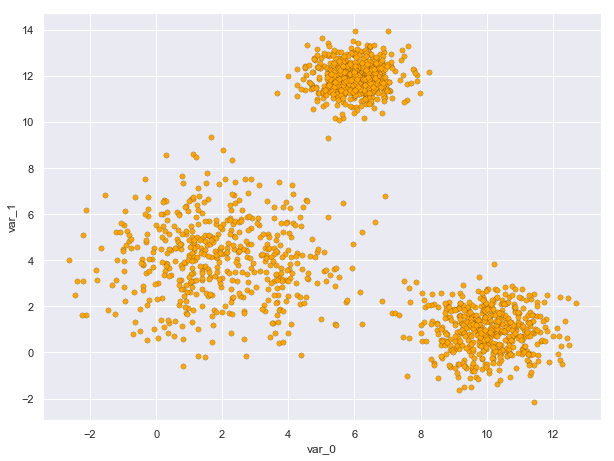

In [5]:
plt.figure(figsize=(10,7.5))
ax = sns.scatterplot(x="var_0", y="var_1",color='orange',data=df,edgecolor="black",linewidth=0.15,s=28)
plt.xlabel("var_0")
plt.ylabel("var_1")
plt.show()

In [6]:
class KMeans():
    def __init__(self,n_clusters = 3,stop_condition=0.005):
        self.n_clusters = n_clusters
        self.stop_condition = stop_condition
    def train(self,X):
        self.X = X
        self.Y = np.zeros(len(self.X))
 
        centroid_points = self.pick_initial_points()
        
        history = pd.DataFrame({'epoch':[0],'loss':[None],'centroid_points':[tuple(map(tuple,centroid_points))]})
        
        for epoch in range(1,100):
            # Distances of points to centroids
            centroid_distances = np.empty((len(self.X),self.n_clusters))
            
            for centroid,ind in zip(centroid_points,range(self.n_clusters)):
                distance = np.linalg.norm(self.X - centroid,axis=1)
                centroid_distances[:,ind] = distance
                
            closest_labels = np.argmin(centroid_distances,axis=1)
            prev_centroid_points = centroid_points.copy()
            # Update centroid point positions
            for i in range(self.n_clusters):
                mask = np.where(closest_labels == i)
                centroid_points[i] = np.mean(self.X[mask],axis=0)
            
            # Calculate Objective Function
            loss = self.objective_function(closest_labels,centroid_points)

            # Record history
            history.loc[history.shape[0]] = [epoch,loss,tuple(map(tuple,centroid_points))]

            # Stop iteration if stop condition is met
            cond = np.linalg.norm(centroid_points - prev_centroid_points,axis=1)
            if(np.all(cond <= self.stop_condition)):
                break

        self.Y = closest_labels
        
        return history
    def objective_function(self,labels,centroid_points):
        loss = 0
        for i in range(self.n_clusters):
            mask = np.where(labels == i)
            loss += np.sum(np.square(np.linalg.norm(self.X[mask] - centroid_points[i],axis=1)))
        return loss
    def pick_initial_points(self):
        initial_points = self.X[np.random.choice(self.X.shape[0], self.n_clusters, replace=False)]
        return initial_points

In [13]:
data = df[['var_0','var_1']].values # Drop labels

n_clusters = 3
stop_condition = 0.0001

clf = KMeans(n_clusters,stop_condition)
history = clf.train(data)

pred = df.copy()
pred['label'] = clf.Y

history.tail()

,epoch,loss,centroid_points
2,2,8323.469410,"((1.134050279329609, 3.8747486033519576), (8.8..."
3,3,4626.965861,"((1.7845815899581592, 4.078096234309623), (9.8..."
4,4,4492.671011,"((1.8765173116089608, 4.0704276985743375), (9...."
5,5,4489.451761,"((1.8993927125506067, 4.057287449392712), (10...."
6,6,4489.451761,"((1.8993927125506067, 4.057287449392712), (10...."


Final objective function value:  4489.451761398215


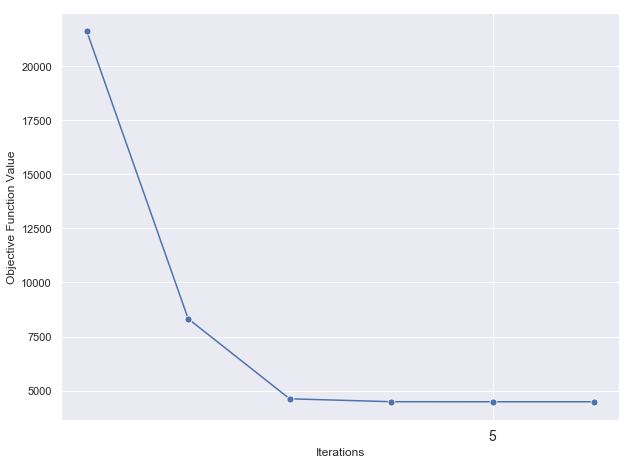

In [14]:
print("Final objective function value: ",history.iloc[-1]['loss'])

fig = plt.figure(figsize=(10,7.5))
plt.xticks(range(0, len(history), 5), fontsize=14)
ax = sns.lineplot(x='epoch',y='loss',marker='o',markersize=7,data=history)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.show()

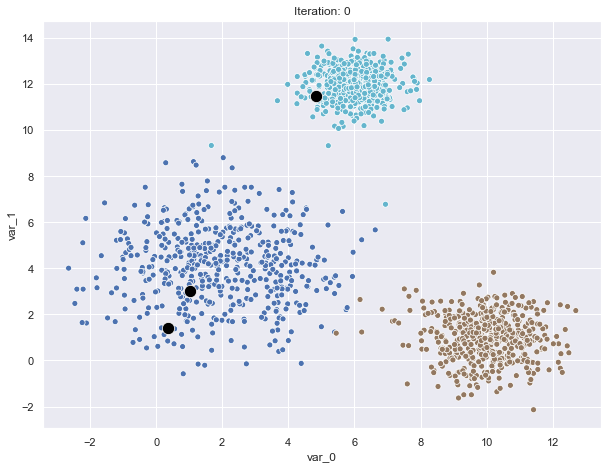

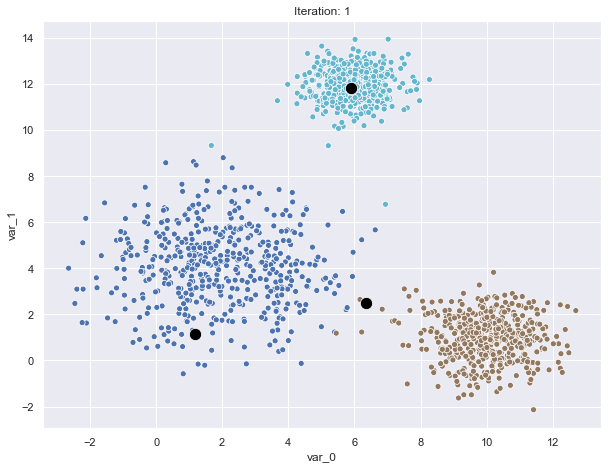

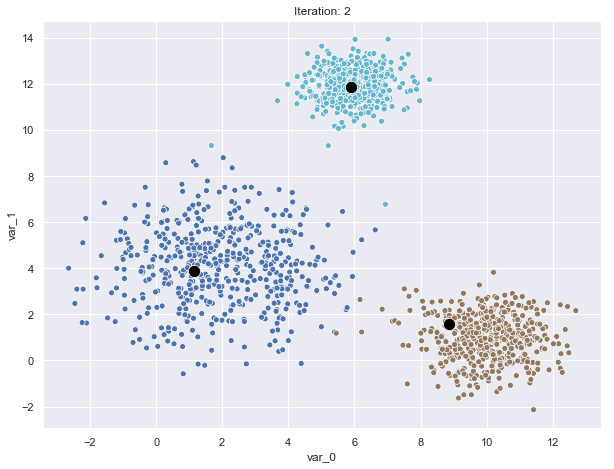

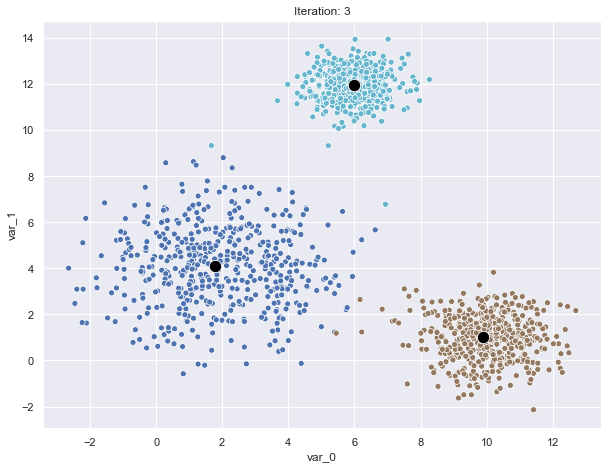

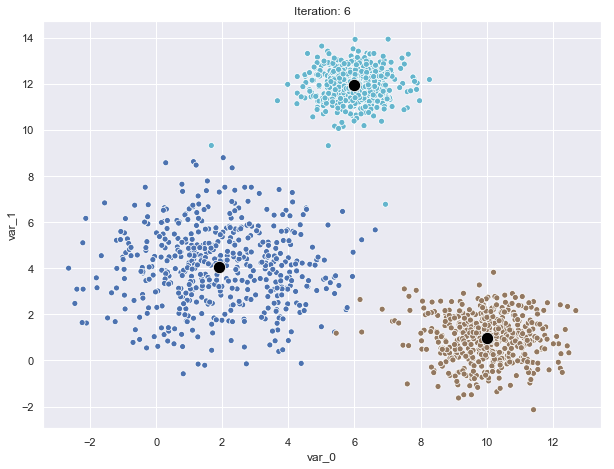

In [15]:
cmap = ListedColormap(sns.color_palette("deep"))
if(n_clusters <= 2):
    cmap = None # Cmap bug
    
def plotEpoch(history,epoch):
    fig,ax = plt.subplots(figsize=(10,7.5))
    ax = sns.scatterplot(x="var_0", y="var_1",hue='label',legend=False,palette=cmap, data=pred)
    ax = sns.scatterplot(x=np.array(history.iloc[epoch]['centroid_points'])[:,0],y=np.array(history.iloc[epoch]['centroid_points'])[:,1],color='black',marker='o',alpha=1.0,s=150)
    if(epoch == -1):
        epoch = len(history) - 1
    plt.title(f"Iteration: {epoch}")
    plt.xlabel("var_0")
    plt.ylabel("var_1")
    plt.show()
    
plotEpoch(history,0)
plotEpoch(history,1)
plotEpoch(history,2)
plotEpoch(history,3)
plotEpoch(history,-1)